In [14]:
import cellular_automata as ca
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def simulate_tumor_growth(time_delay, generations, rows, cols, phi, rho, k1, k2, k3, k4, cancer_init_positions, origin):
    history = {}
    M = ca.initialize_grid(rows, cols, cancer_init_positions)
    M_cluster = []

    for g in range(generations):
        M = ca.simulate_tumor_growth_one_step(M, g, time_delay, history, phi, rho, k1, k2, k3, k4, origin, rows, cols)

        M_cluster.append(M)

    return history, M_cluster

In [3]:
GENERATIONS = 500
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4
RHO = 3.85

TIME_DELAY = 50
NO_TIME_DELAY = 0

In [4]:
tau_histories = []
clusters = []

for tau in range(25,45):
    history, Ms = simulate_tumor_growth(tau, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    tau_histories.append(history)
    
    indiv_clusters = [ca.find_clusters(M, ROWS,COLS) for M in Ms]
    clusters.append([len(indiv_clusters[i]) for i in range(GENERATIONS)])

In [6]:
Nc_histories = [[history[g]['Nc'] for g in range(GENERATIONS)] for history in tau_histories]

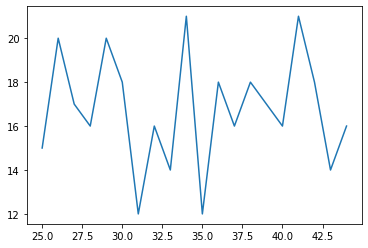

In [25]:
T_ms = []
for i in range(20):
    for generation in range(GENERATIONS):
        if Nc_histories[i][generation] > 49:
            T_ms.append(generation)
            break
            
plt.plot(taus,T_ms)

In [26]:
np.max(T_ms)

21

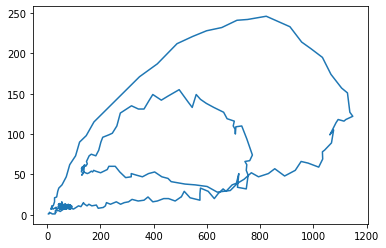

In [13]:
plt.plot(Nc_histories[5],clusters[5])


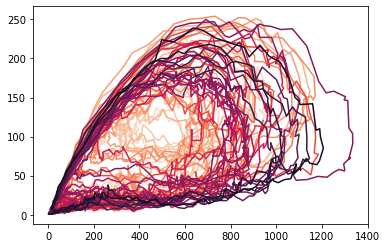

In [15]:
taus = [i for i in range(25,45)]
palette = sns.color_palette('rocket_r', len(taus))

for i,(history, cluster) in enumerate(zip(Nc_histories,clusters)):
    plt.plot(history,cluster, color=palette[i])
    if cluster == 50:
        print()

In [4]:
# history_no_delay, M__no_delay = simulate_tumor_growth(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

In [9]:
# def find_clusters(grid, ROWS,COLS):
#     visited = np.zeros_like(grid, dtype=bool)
#     clusters = []

#     for r in range(ROWS):
#         for c in range(COLS):
#             if grid[r, c] == 'C' and not visited[r, c]:
#                 cluster = set()
#                 stack = [(r, c)]

#                 while stack:
#                     current_r, current_c = stack.pop()
#                     if 0 <= current_r < ROWS and 0 <= current_c < COLS and grid[current_r, current_c] == 'C' and not visited[current_r, current_c]:
#                         visited[current_r, current_c] = True
#                         cluster.add((current_r, current_c))
#                         stack.extend([(current_r + dr, current_c + dc) for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]])

#                 if cluster:
#                     clusters.append(cluster)

#     return clusters

In [26]:
clusters_no_delay = [find_clusters(M, ROWS,COLS) for M in M__no_delay]
len(clusters_no_delay[400])

171

In [29]:
nr_clusters = [len(clusters_no_delay[i]) for i in range(GENERATIONS)]

In [32]:
Nc_without_delay = [history_no_delay[g]['Nc'] for g in range(GENERATIONS)]

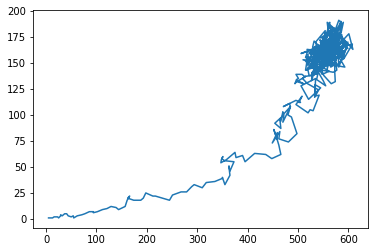

In [33]:
plt.plot(Nc_without_delay,nr_clusters)